In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestRegressor, RandomForestClassifier

In [4]:
from sklearn.model_selection import train_test_split

In [96]:
from sklearn.metrics import classification_report, confusion_matrix

In [133]:
df = pd.read_csv('dataset_3.csv')

In [113]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,classy,divey,hipster,intimate,romantic,touristy,trendy,upscale,Alcohol,no_of_rest
0,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,...,0,0,0,0,0,0,0,0,0,1
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,...,0,0,0,0,0,0,0,0,0,1
2,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,...,0,0,0,0,0,0,0,0,0,263
3,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,41.708520,-81.359556,4.0,16,...,0,0,0,0,0,0,0,0,0,7
4,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,Las Vegas,NV,89156,36.195615,-115.040529,4.5,184,...,0,0,0,0,0,0,0,0,0,1


In [8]:
cols = [x for x in df.columns]

In [12]:
df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'ing_mod', 'cuisine',
       'RestaurantsTakeOut', 'RestaurantsPriceRange2',
       'RestaurantsReservations', 'RestaurantsGoodForGroups', 'GoodForKids',
       'RestaurantsDelivery', 'RestaurantsAttire', 'WiFi', 'Ambience',
       'casual', 'classy', 'divey', 'hipster', 'intimate', 'romantic',
       'touristy', 'trendy', 'upscale', 'Alcohol', 'no_of_rest'],
      dtype='object')

In [13]:
cols = ['review_count', 'stars', 'RestaurantsTakeOut', 'RestaurantsPriceRange2', 'RestaurantsReservations', 'RestaurantsGoodForGroups', 
       'GoodForKids', 'RestaurantsDelivery', 'RestaurantsAttire', 'WiFi', 'casual', 'classy', 'divey', 'hipster', 'intimate', 'romantic',
       'touristy', 'trendy', 'upscale', 'Alcohol', 'no_of_rest']

In [114]:
df = df[cols]
#y = df['no_of_rest']
y = df['no_of_rest'].apply(lambda x:1 if x > 2 else 0)
X = df.drop(['no_of_rest'], axis = 1)

In [115]:
X = pd.get_dummies(X,columns=["RestaurantsAttire"],drop_first=False)
X = pd.get_dummies(X,columns=["WiFi"],drop_first=False)
X = pd.get_dummies(X,columns=["Alcohol"],drop_first=False)
X = pd.get_dummies(X,columns=["RestaurantsPriceRange2"],drop_first=False)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [117]:
X_train.columns

Index(['review_count', 'stars', 'RestaurantsTakeOut',
       'RestaurantsReservations', 'RestaurantsGoodForGroups', 'GoodForKids',
       'RestaurantsDelivery', 'casual', 'classy', 'divey', 'hipster',
       'intimate', 'romantic', 'touristy', 'trendy', 'upscale',
       'RestaurantsAttire_0', 'RestaurantsAttire_casual',
       'RestaurantsAttire_dressy', 'RestaurantsAttire_formal', 'WiFi_0',
       'WiFi_free', 'WiFi_paid', 'Alcohol_0', 'Alcohol_beer_and_wine',
       'Alcohol_full_bar', 'RestaurantsPriceRange2_0',
       'RestaurantsPriceRange2_1', 'RestaurantsPriceRange2_2',
       'RestaurantsPriceRange2_3', 'RestaurantsPriceRange2_4'],
      dtype='object')

In [118]:
X_train

,review_count,stars,RestaurantsTakeOut,RestaurantsReservations,RestaurantsGoodForGroups,GoodForKids,RestaurantsDelivery,casual,classy,divey,...,WiFi_free,WiFi_paid,Alcohol_0,Alcohol_beer_and_wine,Alcohol_full_bar,RestaurantsPriceRange2_0,RestaurantsPriceRange2_1,RestaurantsPriceRange2_2,RestaurantsPriceRange2_3,RestaurantsPriceRange2_4
4729,33,4.0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3623,137,4.0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
28025,15,3.5,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
25448,19,5.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
180,81,4.0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,10,4.5,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
6265,8,4.0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
11284,6,4.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
860,15,3.5,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


Feature ranking:
1. feature 0 (0.762801)
2. feature 1 (0.157478)
3. feature 8 (0.011691)
4. feature 3 (0.010630)
5. feature 15 (0.005695)
6. feature 5 (0.004201)
7. feature 2 (0.004136)
8. feature 9 (0.004093)
9. feature 4 (0.003741)
10. feature 6 (0.003656)
11. feature 11 (0.003479)
12. feature 13 (0.003273)
13. feature 14 (0.003205)
14. feature 7 (0.003164)
15. feature 12 (0.003135)
16. feature 10 (0.002820)
17. feature 16 (0.002368)
18. feature 24 (0.001775)
19. feature 26 (0.001412)
20. feature 18 (0.001392)
21. feature 22 (0.001320)
22. feature 21 (0.001253)
23. feature 17 (0.001244)
24. feature 25 (0.000894)
25. feature 19 (0.000473)
26. feature 20 (0.000351)
27. feature 23 (0.000322)


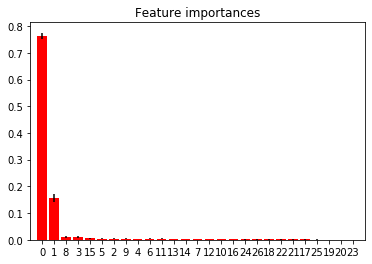

In [53]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [119]:
clf = RandomForestClassifier(n_estimators=1000, max_depth=100,random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [120]:
preds = clf.predict(X_test)

In [121]:
preds

array([0, 0, 0, ..., 0, 1, 0])

In [122]:
clf.feature_importances_

array([5.89949845e-01, 2.98927471e-01, 6.21487298e-03, 6.35503966e-03,
       5.95399026e-03, 5.56732354e-03, 5.01730361e-03, 1.62689613e-02,
       5.11188222e-03, 5.15981301e-03, 5.30587393e-03, 3.80202720e-03,
       3.81967191e-03, 3.57489119e-03, 7.87468676e-03, 2.65048269e-03,
       2.39341683e-03, 2.53092306e-03, 5.05059531e-04, 3.86678329e-04,
       1.95552920e-03, 1.92692064e-03, 2.54960951e-04, 2.92211456e-03,
       1.60125401e-03, 2.15963926e-03, 3.30596992e-03, 3.43123397e-03,
       3.53899797e-03, 1.46392827e-03, 6.92372551e-05])

In [123]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      7874
           1       0.48      0.36      0.41      2523

    accuracy                           0.75     10397
   macro avg       0.64      0.62      0.63     10397
weighted avg       0.73      0.75      0.74     10397



In [124]:
print(confusion_matrix(y_test, preds))

[[6879  995]
 [1611  912]]


In [125]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [126]:
feature_importances

,importance
review_count,0.589950
stars,0.298927
casual,0.016269
trendy,0.007875
RestaurantsReservations,0.006355
RestaurantsTakeOut,0.006215
RestaurantsGoodForGroups,0.005954
GoodForKids,0.005567
hipster,0.005306
divey,0.005160


In [127]:
clf.score(X_test, y_test)

0.7493507742618063

In [142]:
df[df['cuisine'] == 'vegan'].groupby('RestaurantsPriceRange2').count()['business_id']

RestaurantsPriceRange2
0    383
1     10
2     19
Name: business_id, dtype: int64

In [149]:
df[df['stars'] == 5][['name', 'cuisine', 'categories']].head(17)

,name,cuisine,categories
25,Acupuncture with Ashlee,chines,"Traditional Chinese Medicine, Health & Medical..."
203,JP's Dog House,barbequ,"Barbeque, Restaurants, Hot Dogs, Food Stands, ..."
260,Madras Cafe,indian,"Indian, Vegetarian, Restaurants"
327,Unfurl & Laura Novak Massage,chines,"Massage Therapy, Traditional Chinese Medicine,..."
345,Tokyo Peking Asian Restaurants,asian,"Asian Fusion, Japanese, Sushi Bars, Restaurants"
371,Abugida Ethiopian Cafe & Restaurant,ethiopian,"Ethiopian, Restaurants"
408,Crux Comptoir,vegetarian,"Juice Bars & Smoothies, Restaurants, Organic S..."
443,Tha Spot BBQ,barbequ,"Restaurants, Barbeque"
462,Café Ferlucci,cafe,"Specialty Food, Coffee & Tea, Restaurants, Foo..."
535,Place Western,barbequ,"Barbeque, American (New), Restaurants, Smokeho..."


In [147]:
df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'ing_mod', 'cuisine',
       'RestaurantsTakeOut', 'RestaurantsPriceRange2',
       'RestaurantsReservations', 'RestaurantsGoodForGroups', 'GoodForKids',
       'RestaurantsDelivery', 'RestaurantsAttire', 'WiFi', 'Ambience',
       'casual', 'classy', 'divey', 'hipster', 'intimate', 'romantic',
       'touristy', 'trendy', 'upscale', 'Alcohol', 'no_of_rest'],
      dtype='object')